In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.preprocessing import RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split


In [2]:
#merged_df = pd.read_csv('/content/gdrive/MyDrive/all_merged_12_06 (1).csv')
merged_df = pd.read_csv('../data/all_merged_12_06.csv')

In [3]:
merged_df.shape

(3093231, 12)

In [4]:
merged_df = merged_df.drop('Unnamed: 0', axis = 1)
merged_df.head()

,lon,lat,year,month,burned_area,burnable_frac,temperature,precipitation,dry_days,land_cover,country
0,-8.5,33.0,2001,1,0,0.51679,14.0,48.8,115.35,200,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
1,-8.5,33.0,2001,2,0,0.51679,14.6,8.2,115.35,200,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
2,-8.5,33.0,2001,3,0,0.51679,17.5,24.7,115.35,200,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
3,-8.5,33.0,2001,4,0,0.51679,18.0,0.7,115.35,200,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب
4,-8.5,33.0,2001,5,0,0.51679,19.0,8.2,115.35,200,Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب


In [5]:
merged_df['country'].nunique()

46

In [6]:
merged_df.shape

(3093231, 11)

In [7]:
merged_df.isna().sum()

lon                   0
lat                   0
year                  0
month                 0
burned_area           0
burnable_frac         0
temperature       81493
precipitation     81493
dry_days         476933
land_cover            0
country               0
dtype: int64

1. dataset will require some rebalancing

# Splitting the data

In [8]:
train, test = train_test_split(merged_df, test_size=0.3, random_state=42)

In [9]:
X_test = test.drop('burned_area', axis=1)
y_test = test['burned_area']

print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_test:  (927970, 10)
y_test:  (927970,)


# Filling, balancing and splitting train set was run on google colab

## Filling and dropping NAs

In [10]:
#train.isna().sum()

In [11]:
#train['dry_days'] = train.groupby('month')['dry_days'].transform(lambda x: x.fillna(x.median()))
#train = train.dropna()
#
#print('X_test: ', train.shape)
#print('y_test: ', train.shape)

In [12]:
train.isna().sum()

lon                   0
lat                   0
year                  0
month                 0
burned_area           0
burnable_frac         0
temperature       57238
precipitation     57238
dry_days         333753
land_cover            0
country               0
dtype: int64

In [13]:
#X_train = train.drop('burned_area', axis=1)
#y_train = train['burned_area']
#
#print('X_train: ', X_train.shape)
#print('y_train: ', y_train.shape)

## Balancing the data

In [14]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#
#sns.histplot(merged_df['burnable_frac'], ax=ax1)
#sns.histplot(merged_df['burned_area'], ax=ax2);

In [15]:
#X_train.head(3)

In [16]:
#from imblearn.over_sampling import SMOTENC
#smote_nc = SMOTENC(categorical_features=[8, 9], random_state=42, n_jobs = -1)
#X_resampled, y_resampled = smote_nc.fit_resample(X_train, y_train)

In [17]:
#print('X_resampled: ', X_resampled.shape)
#print('y_resampled: ', y_resampled.shape)

In [18]:
#X_resampled.to_csv('/content/gdrive/MyDrive/X_resampled.csv')
#y_resampled.to_csv('/content/gdrive/MyDrive/y_resampled.csv')

In [19]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#
#sns.histplot(X_resampled['burnable_frac'], ax=ax1)
#sns.histplot(y_resampled, ax=ax2);

# Normalisation

In [20]:
X_train = pd.read_csv('../data/X_resampled.csv')
y_train = pd.read_csv('../data/y_resampled.csv')

In [21]:
y_train = y_train['burned_area']
X_train = X_train.drop('Unnamed: 0', axis = 1)

In [22]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)

X_train:  (3928822, 10)
y_train:  (3928822,)


In [23]:
X_train.head(3)

,lon,lat,year,month,burnable_frac,temperature,precipitation,dry_days,land_cover,country
0,49.0,38.00,2008,12,0.585473,-1.5,25.0,40.562500,60,ایران
1,29.5,50.25,2012,3,0.990091,2.3,33.8,19.075000,10,Україна
2,15.5,45.50,2007,2,0.998015,4.1,126.4,30.705357,60,Hrvatska


## longitude and latitude

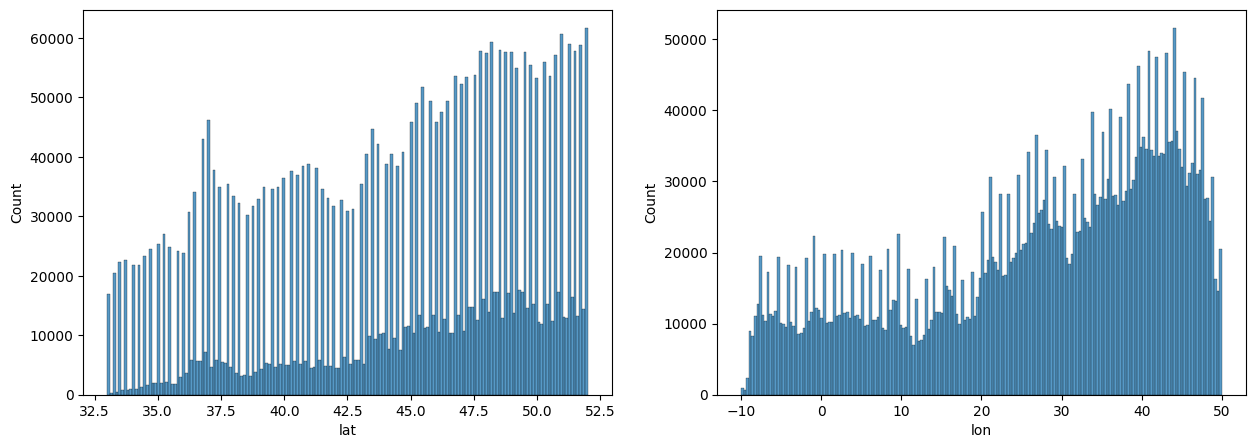

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['lat'], ax= ax1)
sns.histplot(X_train['lon'], ax= ax2);

the lon and lat columns need normalising but I am not sure what is the best approach.<br />
ChatGPT recommended to map longitude and latitude to x and y coordinates -> represents the data in a two-dimensional space

x = cos(lat) * cos(lon) <br />
y = cos(lat) * sin(lon)

In [25]:
X_train['x'] = np.cos(X_train['lat']) * np.cos(X_train['lon'])
X_train['y'] = np.cos(X_train['lat']) * np.sin(X_train['lon'])
X_train = X_train.drop(['lat', 'lon'], axis =1).reset_index(drop = True)

In [26]:
X_test['x'] = np.cos(X_test['lat']) * np.cos(X_test['lon'])
X_test['y'] = np.cos(X_test['lat']) * np.sin(X_test['lon'])
X_test = X_test.drop(['lat', 'lon'], axis =1).reset_index(drop = True)

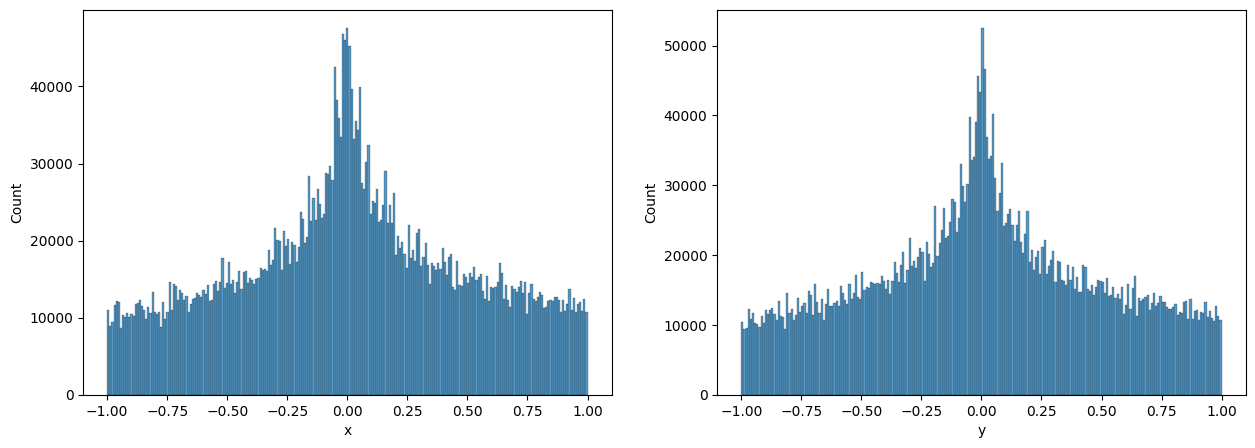

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(X_train['x'], ax= ax1)
sns.histplot(X_train['y'], ax= ax2);

this seems better, both coordinates have normal distribution

In [28]:
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (3928822, 10)
y_train:  (3928822,)
X_test:  (927970, 10)
y_test:  (927970,)


## time columns

In [29]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train = X_train.drop('month', axis = 1)
X_train['year'] = X_train['year'] - X_train['year'].min()


X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test = X_test.drop('month', axis = 1)
X_test['year'] = X_test['year'] - X_test['year'].min()

X_train.head()

,year,burnable_frac,temperature,precipitation,dry_days,land_cover,country,x,y,month_sin,month_cos
0,7,0.585473,-1.5,25.0,40.562500,60,ایران,0.287088,-0.910904,-2.449294e-16,1.000000e+00
1,11,0.990091,2.3,33.8,19.075000,10,Україна,-0.338279,-0.940919,1.000000e+00,6.123234e-17
2,6,0.998015,4.1,126.4,30.705357,60,Hrvatska,-0.051925,0.010957,8.660254e-01,5.000000e-01
3,14,0.951067,21.5,68.5,19.975000,10,Україна,-0.271643,-0.128709,1.224647e-16,-1.000000e+00
4,17,0.995599,19.1,20.7,27.726190,100,España,0.369707,0.152659,-1.000000e+00,-1.836970e-16


# climate data

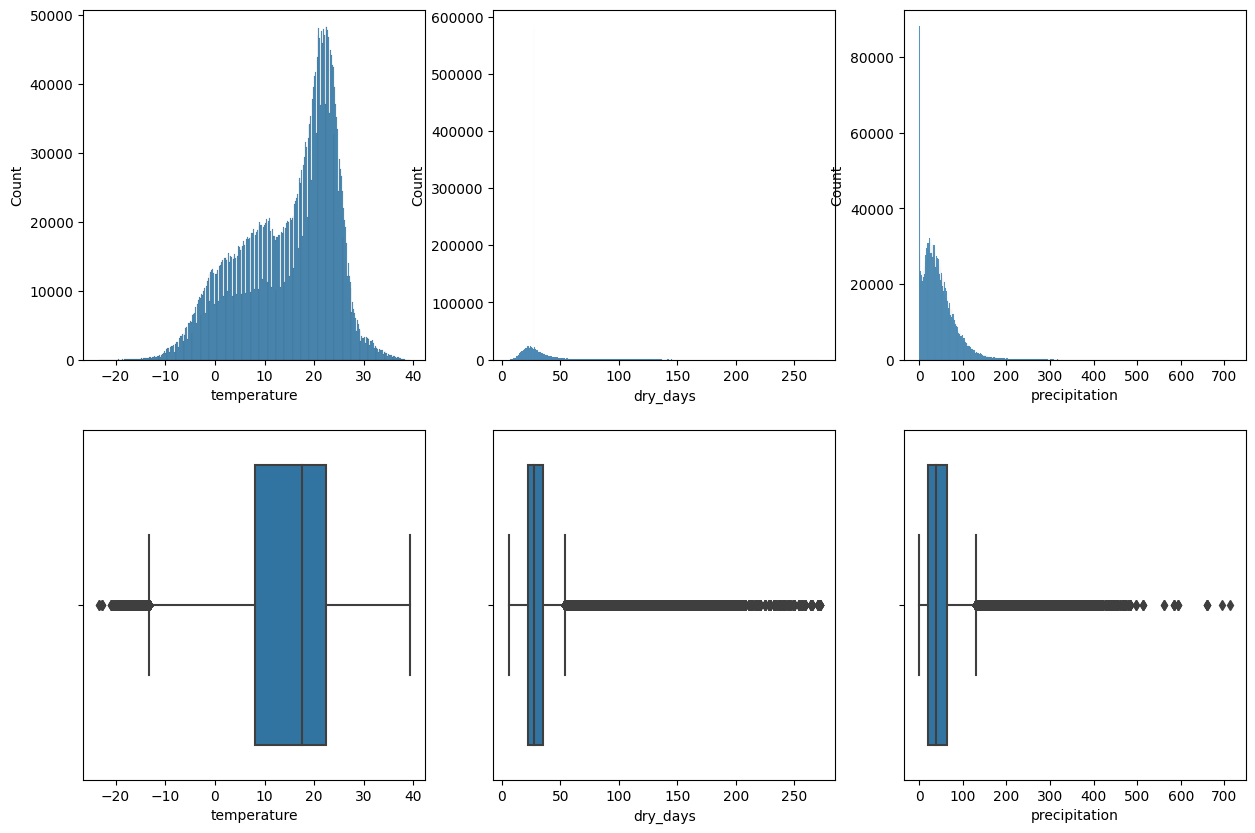

In [30]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['temperature'], ax= ax1)
sns.histplot(X_train['dry_days'], ax= ax2)
sns.histplot(X_train['precipitation'], ax= ax3)


sns.boxplot(data = X_train, x= 'temperature', ax=ax4)
sns.boxplot(data = X_train, x= 'dry_days', ax=ax5)
sns.boxplot(data = X_train, x= 'precipitation', ax=ax6);

tas and maxtas seem to have normal distribution but there are some outliers so I am using RobustScaler on all three

In [31]:
rb_scaler = RobustScaler()
X_train[['temperature', 'dry_days', 'precipitation']] = rb_scaler.fit_transform(X_train[['temperature', 'dry_days', 'precipitation']])
X_test[['temperature', 'dry_days', 'precipitation']] = rb_scaler.transform(X_test[['temperature', 'dry_days', 'precipitation']])

X_train.head()

,year,burnable_frac,temperature,precipitation,dry_days,land_cover,country,x,y,month_sin,month_cos
0,7,0.585473,-1.342652,-0.314196,1.013571,60,ایران,0.287088,-0.910904,-2.449294e-16,1.000000e+00
1,11,0.990091,-1.075527,-0.113051,-0.683109,10,Україна,-0.338279,-0.940919,1.000000e+00,6.123234e-17
2,6,0.998015,-0.948995,2.003547,0.235239,60,Hrvatska,-0.051925,0.010957,8.660254e-01,5.000000e-01
3,14,0.951067,0.274154,0.680102,-0.612044,10,Україна,-0.271643,-0.128709,1.224647e-16,-1.000000e+00
4,17,0.995599,0.105444,-0.412483,0.000000,100,España,0.369707,0.152659,-1.000000e+00,-1.836970e-16


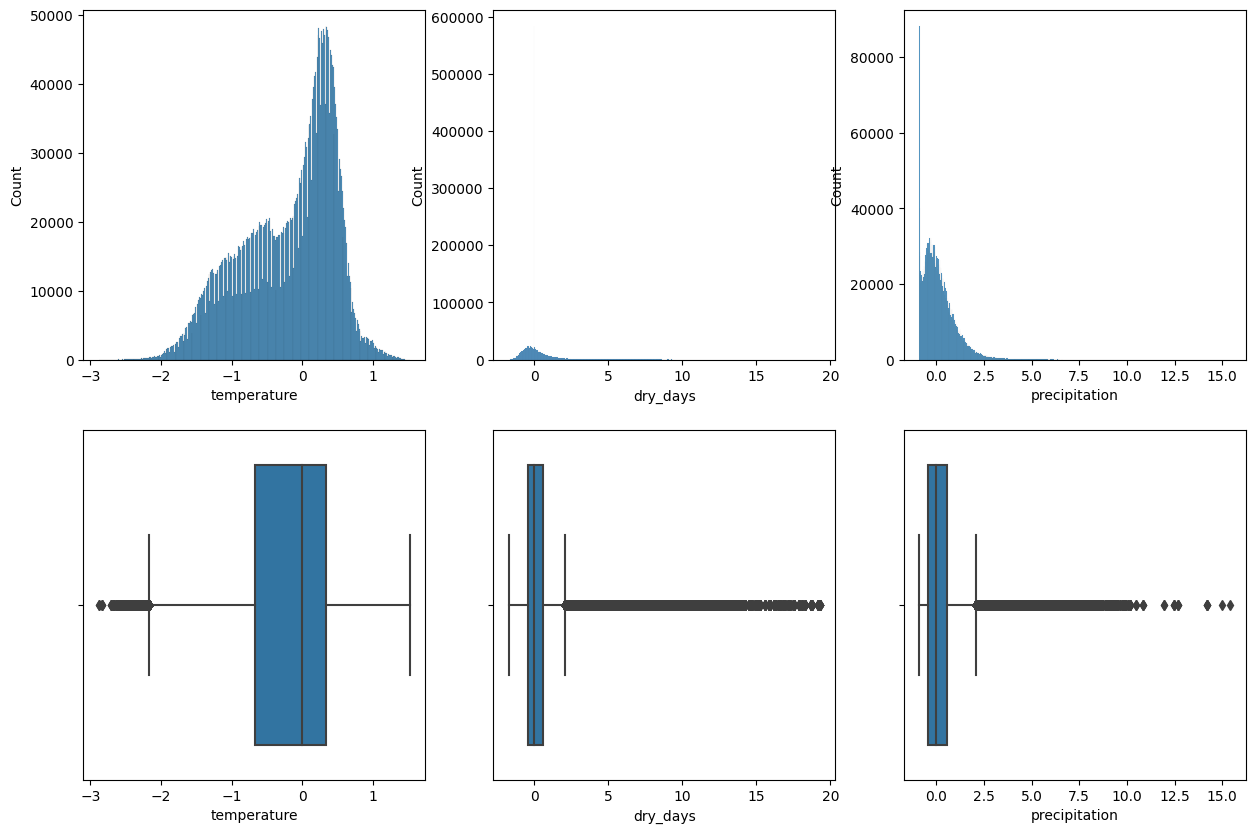

In [32]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(X_train['temperature'], ax= ax1)
sns.histplot(X_train['dry_days'], ax= ax2)
sns.histplot(X_train['precipitation'], ax= ax3)

sns.boxplot(data = X_train, x= 'temperature', ax=ax4)
sns.boxplot(data = X_train, x= 'dry_days', ax=ax5)
sns.boxplot(data = X_train, x= 'precipitation', ax=ax6);

data is rescaled

## Country

In [33]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['country']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['country']])
X_train.drop(columns = ["country"], inplace = True)

X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['country']])
X_test.drop(columns = ["country"], inplace = True)


X_train.head()

,year,burnable_frac,temperature,precipitation,dry_days,land_cover,x,y,month_sin,month_cos,...,country_Україна,country_Қазақстан,country_Հայաստան,country_العراق,country_ایران,country_تونس,country_سوريا,country_لبنان,country_საქართველო,country_ⵍⵣⵣⴰⵢⴻⵔ / الجزائر
0,7,0.585473,-1.342652,-0.314196,1.013571,60,0.287088,-0.910904,-2.449294e-16,1.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11,0.990091,-1.075527,-0.113051,-0.683109,10,-0.338279,-0.940919,1.000000e+00,6.123234e-17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.998015,-0.948995,2.003547,0.235239,60,-0.051925,0.010957,8.660254e-01,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14,0.951067,0.274154,0.680102,-0.612044,10,-0.271643,-0.128709,1.224647e-16,-1.000000e+00,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0.995599,0.105444,-0.412483,0.000000,100,0.369707,0.152659,-1.000000e+00,-1.836970e-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# fire data

### burnable_frac
this is already in a range of 0 - 1

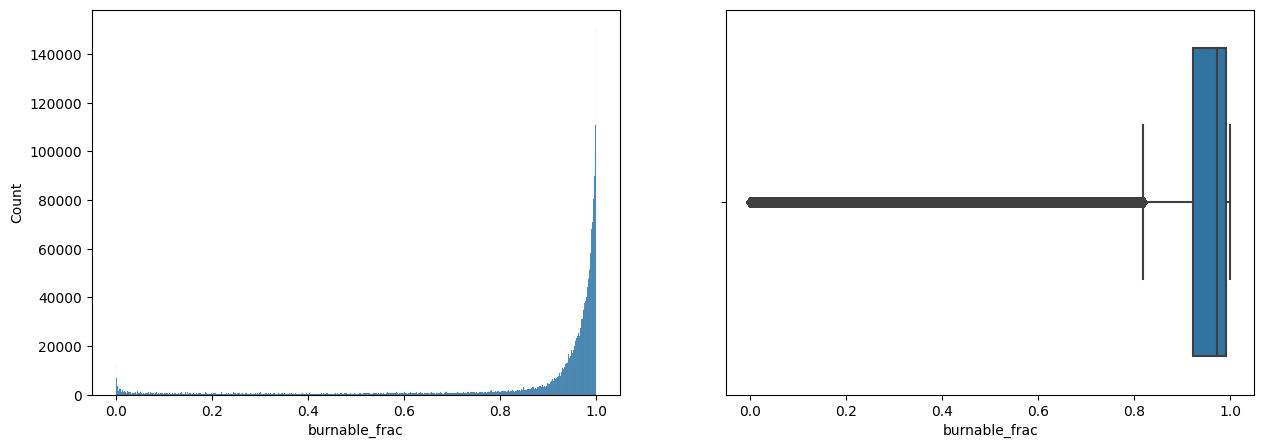

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['burnable_frac'], ax= ax1)
sns.boxplot(data = X_train, x= 'burnable_frac', ax=ax2);

the distribution is not normal and there are outliers. I will perform Robust Scaer as well but not sure whether this is neccessary

In [35]:
rb_scaler2 = RobustScaler()
X_train[['burnable_frac']] = rb_scaler2.fit_transform(X_train[['burnable_frac']])
X_test[['burnable_frac']] = rb_scaler2.transform(X_test[['burnable_frac']])

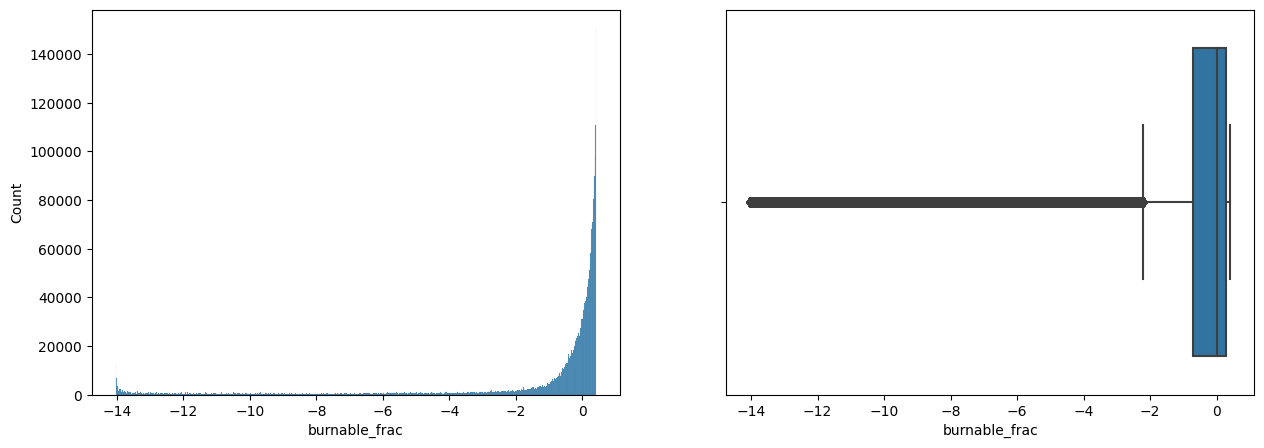

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(X_train['burnable_frac'], ax= ax1)
sns.boxplot(data = X_train, x= 'burnable_frac', ax=ax2);

## landcover data

In [37]:
X_train.head(3)

,year,burnable_frac,temperature,precipitation,dry_days,land_cover,x,y,month_sin,month_cos,...,country_Україна,country_Қазақстан,country_Հայաստան,country_العراق,country_ایران,country_تونس,country_سوريا,country_لبنان,country_საქართველო,country_ⵍⵣⵣⴰⵢⴻⵔ / الجزائر
0,7,-5.573993,-1.342652,-0.314196,1.013571,60,0.287088,-0.910904,-2.449294e-16,1.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11,0.271694,-1.075527,-0.113051,-0.683109,10,-0.338279,-0.940919,1.000000e+00,6.123234e-17,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.386167,-0.948995,2.003547,0.235239,60,-0.051925,0.010957,8.660254e-01,5.000000e-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


land_cover are classes so I use OneHot Encoder

In [38]:
ohe = OneHotEncoder(sparse = False) 

ohe.fit(X_train[['land_cover']])
X_train[ohe.get_feature_names_out()] = ohe.transform(X_train[['land_cover']])
X_train.drop(columns = ["land_cover"], inplace = True)

X_test[ohe.get_feature_names_out()] = ohe.transform(X_test[['land_cover']])
X_test.drop(columns = ["land_cover"], inplace = True)


X_train.head()

: 

: 

### burned area

already 0 and 1 so no need for an encoder

In [ ]:
y_train.head()

# Reducing data size

train data

In [ ]:
# specify the columns to convert
columns_to_convert = X_train.columns

# loop over the columns and convert them to more memory-efficient data types
for column in columns_to_convert:
    if pd.api.types.is_integer_dtype(X_train[column]):
        # check the maximum value in the column
        max_value = X_train[column].max()
        if max_value <= 2147483647:
            # convert the column to int32
            X_train[column] = X_train[column].astype('int32')
    elif pd.api.types.is_float_dtype(X_train[column]):
        # check the range and precision of the values in the column
        max_value = X_train[column].max()
        std_value = X_train[column].std()
        if max_value <= 3.4e38 and std_value >= 1.2e-7:
            # convert the column to float32
            X_train[column] = X_train[column].astype('float32')
            
y_train = y_train.astype('int32')


test data

In [ ]:
# specify the columns to convert
columns_to_convert = X_test.columns

# loop over the columns and convert them to more memory-efficient data types
for column in columns_to_convert:
    if pd.api.types.is_integer_dtype(X_test[column]):
        # check the maximum value in the column
        max_value = X_test[column].max()
        if max_value <= 2147483647:
            # convert the column to int32
            X_test[column] = X_test[column].astype('int32')
    elif pd.api.types.is_float_dtype(X_test[column]):
        # check the range and precision of the values in the column
        max_value = X_test[column].max()
        std_value = X_test[column].std()
        if max_value <= 3.4e38 and std_value >= 1.2e-7:
            # convert the column to float32
            X_test[column] = X_test[column].astype('float32')
            
y_test = y_test.astype('int32')


saving data

In [ ]:
'''
X_train.to_csv('../data/X_train.csv', index=False)
y_train.to_csv('../data/y_train.csv', index=False)
X_test.to_csv('../data/X_test.csv', index=False)
y_test.to_csv('../data/y_test.csv', index=False)
'''